In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_covnf_ocv = h5py.File('data/classifier_data_train.h5','r')
x = np.array(train_covnf_ocv['mpjpe'])

In [29]:
val_conf_ocv = h5py.File('data/h36m/classifier_data_val.h5','r')
y = np.array(val_conf_ocv['mpjpe'])
print(y.shape)

(27558, 4)


In [14]:
err_diff = []
for row in x:
    min_score = min(row)
    diff = row - min_score
    err_diff.append(min(diff[diff!=0.0]))
    
err_diff = np.array(err_diff)

In [15]:
err_diff

array([3.3280754, 3.5705795, 4.3205338, ..., 1.6399078, 2.0988102,
       0.2702484], dtype=float32)

In [33]:
x[3499]

array([30.631159, 31.448507, 32.838963, 36.31794 ], dtype=float32)

In [9]:
x[4]

array([29.985712, 32.929703, 38.45173 , 30.13828 ], dtype=float32)

In [16]:
np.max(err_diff),np.min(err_diff),np.mean(err_diff), err_diff.shape

(118.57311, 8.010864e-05, 5.0522094, (78047,))

In [19]:
np.sum(err_diff < 0.5)

6380

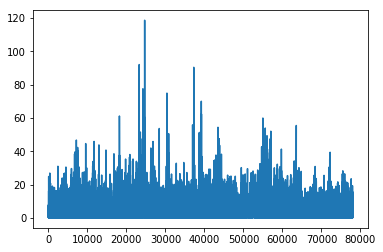

In [17]:
plt.figure()
plt.plot(err_diff)

In [22]:
train_covnf_ocv.keys()

<KeysViewHDF5 ['action', 'bbox', 'id', 'joint_2d_gt', 'joint_2d_pred', 'joint_3d_gt', 'mpjpe', 'subaction', 'subject']>

In [26]:
for key in train_covnf_ocv.keys():
    print(train_covnf_ocv[key])
    print(train_covnf_ocv[key][0])

<HDF5 dataset "action": shape (78047,), type "|u1">
2
<HDF5 dataset "bbox": shape (78047, 4, 4), type "<u2">
[[265 265 658 658]
 [352 236 728 612]
 [443 197 827 581]
 [273 137 771 635]]
<HDF5 dataset "id": shape (78047,), type "<u2">
1
<HDF5 dataset "joint_2d_gt": shape (78047, 4, 16, 2), type "<f4">
[[[137.13937  203.28787 ]
  [122.142105 151.10655 ]
  [134.17036  104.057594]
  [102.84673  100.52475 ]
  [108.69632  154.72946 ]
  [115.01845  209.65567 ]
  [118.642395 102.302284]
  [126.88787   75.29246 ]
  [122.818184  42.865284]
  [125.5133    18.517878]
  [142.40004  108.833206]
  [145.15392   84.323074]
  [138.22865   52.01548 ]
  [107.460884  53.873486]
  [ 93.84051   85.697   ]
  [ 84.14053  106.81881 ]]

 [[102.30385  196.96098 ]
  [103.35151  154.13206 ]
  [106.1785   101.182915]
  [135.81111   98.98996 ]
  [129.72466  151.36557 ]
  [126.783066 201.35194 ]
  [120.84476  100.09314 ]
  [118.92134   72.23214 ]
  [122.68948   41.271584]
  [119.73654   17.640327]
  [ 86.32072  109.31

In [27]:
2148952/4

537238.0

In [39]:
img_path = 's_11_act_02_subact_02_ca_01_001711.jpg'

In [42]:
s,a,sub,cam = np.array(img_path.split('_')[1::2]).astype(np.int)
idd = int(img_path.split('_')[-1].strip('.jpg'))
print(s,a,sub,cam, idd)

11 2 2 1 1711


In [45]:
cd src

/home/vectorweb3/Documents/Development_Sandbox/rak/vision/pytorch-pose-hg-3d/src


In [49]:
cd lib

/home/vectorweb3/Documents/Development_Sandbox/rak/vision/pytorch-pose-hg-3d/src/lib


In [67]:
x[16520:16528]

array([[49.222015, 49.88009 , 53.917007, 43.897743],
       [45.44307 , 46.24754 , 47.93959 , 43.21526 ],
       [44.95939 , 46.468807, 53.777744, 41.725597],
       [47.269676, 45.03511 , 49.66266 , 49.253044],
       [47.920593, 45.8396  , 52.620525, 40.939365],
       [49.34487 , 44.693687, 61.282703, 45.488857],
       [44.586464, 42.566055, 44.053864, 51.07917 ],
       [39.070644, 39.59685 , 47.810783, 42.10605 ]], dtype=float32)

In [61]:
train_covnf_ocv['joint_2d_pred'][16574]

array([[[31.      , 58.484375],
        [31.      , 39.484375],
        [37.      , 32.578125],
        [28.      , 34.4375  ],
        [20.      , 41.3125  ],
        [21.      , 59.328125],
        [33.      , 33.515625],
        [33.      , 16.515625],
        [33.      , 13.515625],
        [32.      ,  6.5     ],
        [33.      , 19.515625],
        [43.      , 19.671875],
        [38.      , 15.59375 ],
        [28.      , 16.4375  ],
        [22.      , 25.34375 ],
        [24.      , 24.375   ]],

       [[25.      , 54.390625],
        [24.      , 38.375   ],
        [30.      , 27.46875 ],
        [38.      , 28.59375 ],
        [34.      , 40.53125 ],
        [33.      , 56.515625],
        [34.      , 28.53125 ],
        [33.      , 13.515625],
        [33.      , 11.515625],
        [32.      ,  6.5     ],
        [25.      , 20.390625],
        [20.      , 18.3125  ],
        [29.      , 13.453125],
        [38.      , 13.59375 ],
        [42.      , 22.65625 ],
      

In [68]:
import cv2
img = cv2.imread('/home/vectorweb3/Documents/Development_Sandbox/rak/vision/_h36/_h36-2/s_09_act_16_subact_01_ca_04/s_09_act_16_subact_01_ca_04_000001.jpg')
print(img.shape)

(224, 224, 3)
